In [40]:

# # IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# # TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# # THEN FEEL FREE TO DELETE THIS CELL.
# # NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# # ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# # NOTEBOOK.

# import os
# import sys
# from tempfile import NamedTemporaryFile
# from urllib.request import urlopen
# from urllib.parse import unquote, urlparse
# from urllib.error import HTTPError
# from zipfile import ZipFile
# import tarfile
# import shutil

# CHUNK_SIZE = 40960
# DATA_SOURCE_MAPPING = 'fruits:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5857%2F2609027%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240423%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240423T182306Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dc682cd0b198b3b3e9ae66babad6d3e190d2aa56a6e23e4a78ce336facfdedbd565f41519f73e4e350cbfa884bd6a5d79e6457788d90a1736635ab9a475116d3d6de42dfff0b4084a668da64cb51bdc166eff030b2e443680bf9815139bf5578f2d83111a7a94a5c934266f4b0ec85e0a34e1c4cde0fe07a2964adb4fbd6df7682b05b7ffe831c33d92e778a3f4663d57439352dd117fb035d02cc5bcd0f12205941b35ee6d3ac0a22cf2fe334aafb9fdb10bcd4b8114602fe2253bfd8524c0ab86a7c771354e58b2e91b663de358bf6657a797de9c9cf571d8060dd13d8ce11d3b30a7b19a73ff9f619e926fa1b0416b588ab1c554399a7774fb6de25d17fa58'

# KAGGLE_INPUT_PATH='/kaggle/input'
# KAGGLE_WORKING_PATH='/kaggle/working'
# KAGGLE_SYMLINK='kaggle'

# !umount /kaggle/input/ 2> /dev/null
# shutil.rmtree('/kaggle/input', ignore_errors=True)
# os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
# os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

# try:
#   os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
# except FileExistsError:
#   pass
# try:
#   os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
# except FileExistsError:
#   pass

# for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
#     directory, download_url_encoded = data_source_mapping.split(':')
#     download_url = unquote(download_url_encoded)
#     filename = urlparse(download_url).path
#     destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
#     try:
#         with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
#             total_length = fileres.headers['content-length']
#             print(f'Downloading {directory}, {total_length} bytes compressed')
#             dl = 0
#             data = fileres.read(CHUNK_SIZE)
#             while len(data) > 0:
#                 dl += len(data)
#                 tfile.write(data)
#                 done = int(50 * dl / int(total_length))
#                 sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
#                 sys.stdout.flush()
#                 data = fileres.read(CHUNK_SIZE)
#             if filename.endswith('.zip'):
#               with ZipFile(tfile) as zfile:
#                 zfile.extractall(destination_path)
#             else:
#               with tarfile.open(tfile.name) as tarfile:
#                 tarfile.extractall(destination_path)
#             print(f'\nDownloaded and uncompressed: {directory}')
#     except HTTPError as e:
#         print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
#         continue
#     except OSError as e:
#         print(f'Failed to load {download_url} to path {destination_path}')
#         continue

# print('Data source import complete.')


In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D,MaxPooling2D
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from sklearn.datasets import load_files
from tensorflow.keras.utils import to_categorical
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator as datagen


In [42]:
Training_path = '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training'


labels = [label for label in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, label))]
labels.sort()
# Print the labels
print("Labels in the folder set:")
for label in labels:
    print(label)

Labels in the folder set:
Apple Braeburn
Apple Crimson Snow
Apple Golden 1
Apple Golden 2
Apple Golden 3
Apple Granny Smith
Apple Pink Lady
Apple Red 1
Apple Red 2
Apple Red 3
Apple Red Delicious
Apple Red Yellow 1
Apple Red Yellow 2
Apricot
Avocado
Avocado ripe
Banana
Banana Lady Finger
Banana Red
Beetroot
Blueberry
Cactus fruit
Cantaloupe 1
Cantaloupe 2
Carambula
Cauliflower
Cherry 1
Cherry 2
Cherry Rainier
Cherry Wax Black
Cherry Wax Red
Cherry Wax Yellow
Chestnut
Clementine
Cocos
Corn
Corn Husk
Cucumber Ripe
Cucumber Ripe 2
Dates
Eggplant
Fig
Ginger Root
Granadilla
Grape Blue
Grape Pink
Grape White
Grape White 2
Grape White 3
Grape White 4
Grapefruit Pink
Grapefruit White
Guava
Hazelnut
Huckleberry
Kaki
Kiwi
Kohlrabi
Kumquats
Lemon
Lemon Meyer
Limes
Lychee
Mandarine
Mango
Mango Red
Mangostan
Maracuja
Melon Piel de Sapo
Mulberry
Nectarine
Nectarine Flat
Nut Forest
Nut Pecan
Onion Red
Onion Red Peeled
Onion White
Orange
Papaya
Passion Fruit
Peach
Peach 2
Peach Flat
Pear
Pear 2
Pear A

In [43]:
Test_path     = '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test'

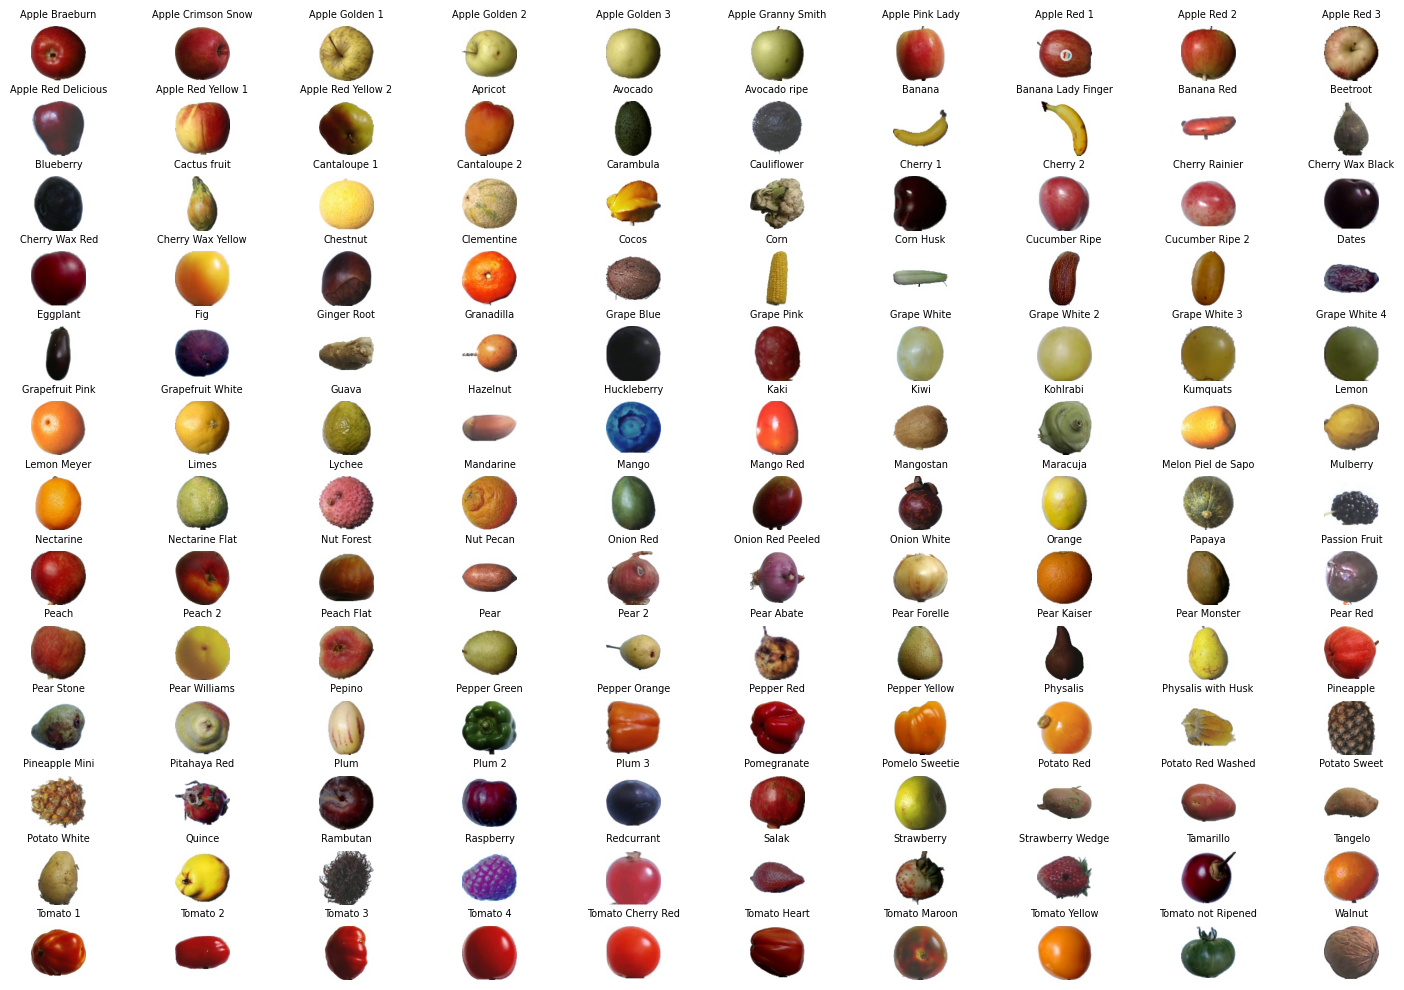

In [44]:
plt.figure(figsize=(15 , 10))
for i in range(130):
  path = []
  for x in os.listdir(os.path.join(Training_path, labels[i])):
    path.append(x)
  img = mpimg.imread(os.path.join(Training_path,labels[i], path[i]))
  #img = image_resize_rescale(img)
  plt.subplot(13, 10, i + 1)
  plt.title(labels[i], fontsize=7)
  plt.axis('off')
  plt.imshow(img)
plt.tight_layout(h_pad=0.3)
plt.show()

In [45]:
path = '/kaggle/input/fruits/fruits-360_dataset/fruits-360'
TrainLabels  = []
TestLabels   = []
TrainSamples = []
TestSamples  = []
for i in os.listdir(os.path.join(path + '/Training/')):
  TrainLabels.append(i)
  TrainSamples.append(len(os.listdir(os.path.join(path + '/Training/' + i))))

for i in os.listdir(os.path.join(path + '/Test/')):
  TestLabels.append(i)
  TestSamples.append(len(os.listdir(os.path.join(path + '/Test/' + i))))
TrainLabels.sort()
TestLabels.sort()
print('(Train,Test)')
for i in range(len(TrainLabels)):
    print(f'No. Samples of {TrainLabels[i]}: ({TrainSamples[i]},{TestSamples[i]})')


(Train,Test)
No. Samples of Apple Braeburn: (490,166)
No. Samples of Apple Crimson Snow: (490,166)
No. Samples of Apple Golden 1: (492,164)
No. Samples of Apple Golden 2: (471,157)
No. Samples of Apple Golden 3: (490,166)
No. Samples of Apple Granny Smith: (492,164)
No. Samples of Apple Pink Lady: (471,158)
No. Samples of Apple Red 1: (711,237)
No. Samples of Apple Red 2: (492,164)
No. Samples of Apple Red 3: (735,249)
No. Samples of Apple Red Delicious: (490,166)
No. Samples of Apple Red Yellow 1: (450,150)
No. Samples of Apple Red Yellow 2: (456,152)
No. Samples of Apricot: (490,166)
No. Samples of Avocado: (492,164)
No. Samples of Avocado ripe: (490,166)
No. Samples of Banana: (490,166)
No. Samples of Banana Lady Finger: (490,166)
No. Samples of Banana Red: (462,154)
No. Samples of Beetroot: (492,164)
No. Samples of Blueberry: (666,222)
No. Samples of Cactus fruit: (468,156)
No. Samples of Cantaloupe 1: (480,160)
No. Samples of Cantaloupe 2: (453,151)
No. Samples of Carambula: (738,

In [46]:
img_height = 100
img_width  = 100

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generator for training data
train_generator = train_datagen.flow_from_directory(
    Training_path,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical')

# Create generator for test data
test_generator = test_datagen.flow_from_directory(
    Test_path,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical')

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [47]:
model = Sequential()
model.add(InputLayer(input_shape=(img_height,img_width,3)))
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=(5,5), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(131, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 16)      1216      
                                                                 
 batch_normalization_4 (Bat  (None, 100, 100, 16)      64        
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 50, 50, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 32)        12832     
                                                                 
 batch_normalization_5 (Bat  (None, 50, 50, 32)        128       
 chNormalization)                                                
                                                      

In [51]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6, verbose=1)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history =  model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=100,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

Epoch 1/100
2115/2115 [==============================] - ETA: 0s - loss: 0.1688 - accuracy: 0.9585
Epoch 1: val_accuracy improved from -inf to 0.91877, saving model to best_model.keras
2115/2115 [==============================] - 214s 101ms/step - loss: 0.1688 - accuracy: 0.9585 - val_loss: 0.3482 - val_accuracy: 0.9188 - lr: 0.0010
Epoch 2/100
 583/2115 [=======>......................] - ETA: 2:19 - loss: 0.0691 - accuracy: 0.9848

In [ ]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=test_generator.samples // test_generator.batch_size)
print('Test accuracy:', test_acc)